In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [2]:
data = pd.read_excel("Bengaluru_Booking_Data.xlsx")

In [3]:
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for Cancelling by Customer,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating
0,2024-12-15,15:29:44,CNR3746317213,Success,5506,Prime Plus,Ulsoor,Electronic City,11.57,21.92,0,NaN,0,NaN,0,NaN,575.50,6.25,4.3,3.5
1,2024-12-23,19:40:56,CNR7635473142,Success,5557,Prime SUV,Koramangala,Yelahanka,12.48,22.45,0,NaN,0,NaN,0,NaN,236.10,3.23,3.6,4.8
2,2024-12-20,05:36:52,CNR7887950851,Cancelled by Driver,8527,Bike,Hebbal,HBR Layout,NaN,NaN,0,NaN,1,Personal & Car related issues,0,NaN,NaN,NaN,NaN,NaN
3,2024-12-14,10:57:58,CNR7665963761,Cancelled by Driver,6925,Bike,Yeshwanthpur,Girinagar,NaN,NaN,0,NaN,1,Personal & Car related issues,0,NaN,NaN,NaN,NaN,NaN
4,2025-01-05,21:01:53,CNR9786748825,Success,5741,Auto,Ulsoor,Marathahalli,6.94,16.34,0,NaN,0,NaN,0,NaN,602.97,17.84,4.5,3.6


In [4]:
print("Last 5 rows of the dataset:")
data.tail()

Last 5 rows of the dataset:


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for Cancelling by Customer,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating
99995,2024-12-25,13:12:55,CNR2824226031,Success,6667,Prime Plus,Indiranagar,KR Puram,9.60,10.86,0,NaN,0,NaN,0,NaN,621.92,9.45,4.8,3.8
99996,2025-01-06,09:51:18,CNR1074550905,Success,5272,Prime SUV,Varthur,Richmond Town,2.52,28.38,0,NaN,0,NaN,0,NaN,810.24,24.56,4.2,4.5
99997,2025-01-07,14:39:54,CNR6860581204,Success,7889,eBike,Sadashivanagar,BTM Layout,12.47,25.94,0,NaN,0,NaN,0,NaN,385.49,4.34,4.8,4.9
99998,2025-01-03,21:44:06,CNR6123858694,Success,4307,Bike,Nagarbhavi,Whitefield,2.11,8.69,0,NaN,0,NaN,0,NaN,725.01,1.72,3.8,3.9
99999,2024-12-20,01:29:48,CNR8076023961,Cancelled by Customer,6893,Prime Sedan,MG Road,KR Puram,NaN,NaN,1,Driver asked to cancel,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
print(f'Dataset have {data.shape[0]} rows and {data.shape[1]} columns')

Dataset have 100000 rows and 20 columns


In [6]:
print("Information about the dataset:")
data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               100000 non-null  datetime64[ns]
 1   Time                               100000 non-null  object        
 2   Booking ID                         100000 non-null  object        
 3   Booking Status                     100000 non-null  object        
 4   Customer ID                        100000 non-null  int64         
 5   Vehicle Type                       100000 non-null  object        
 6   Pickup Location                    100000 non-null  object        
 7   Drop Location                      100000 non-null  object        
 8   Avg VTAT                           61950 non-null   float64       
 9   Avg CTAT                           61950 non-null   float64   

In [7]:
data.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for Cancelling by Customer', 'Cancelled Rides by Driver',
       'Reason for Cancelling by Driver', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating'],
      dtype='object')

In [8]:
print("Summary statistics for numeric columns")
data.describe().T

Summary statistics for numeric columns


,count,mean,min,25%,50%,75%,max,std
Date,100000,2024-12-24 13:00:38.303999744,2024-12-10 00:00:00,2024-12-17 00:00:00,2024-12-25 00:00:00,2025-01-01 00:00:00,2025-01-08 00:00:00,NaN
Customer ID,100000.0,5492.40721,1000.0,3232.0,5494.0,7732.25,9999.0,2597.104827
Avg VTAT,61950.0,8.500475,2.0,5.26,8.49,11.76,15.0,3.752006
Avg CTAT,61950.0,17.55126,5.0,11.37,17.56,23.77,30.0,7.191371
Cancelled Rides by Customer,100000.0,0.06994,0.0,0.0,0.0,0.0,1.0,0.255047
Cancelled Rides by Driver,100000.0,0.17957,0.0,0.0,0.0,0.0,1.0,0.383831
Incomplete Rides,100000.0,0.06029,0.0,0.0,0.0,0.0,1.0,0.238025
Booking Value,61950.0,492.104273,100.01,261.65,415.5,643.395,2919.8,320.078553
Ride Distance,61950.0,13.025065,1.0,7.06,13.0,19.01,25.0,6.922113
Driver Ratings,61950.0,4.25185,3.5,3.9,4.3,4.6,5.0,0.435872


In [9]:
for i in range(len(data.columns)):
    if data.iloc[:,i].isna().sum()!=0:
        print(i)
    else:
        print('None')

None
None
None
None
None
None
None
None
8
9
None
11
None
13
None
15
16
17
18
19


In [10]:
round(data.isnull().sum() * 100 / data.shape[0],2).sort_values()

,0
Date,0.00
Time,0.00
Booking ID,0.00
Booking Status,0.00
Customer ID,0.00
Vehicle Type,0.00
Pickup Location,0.00
Drop Location,0.00
Cancelled Rides by Customer,0.00
Incomplete Rides,0.00


In [11]:
duplicates = data[data.duplicated()]
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [12]:
# Handling columns with missing values

numerical_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance']
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

rating_cols = ['Driver Ratings', 'Customer Rating']
for col in rating_cols:
    data[col] = data[col].fillna(data[col].mean())

categorical_cols = ['Reason for Cancelling by Customer', 'Reason for Cancelling by Driver', 'Incomplete Rides Reason']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [13]:
print(data.isnull().sum())

Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Cancelled Rides by Customer          0
Reason for Cancelling by Customer    0
Cancelled Rides by Driver            0
Reason for Cancelling by Driver      0
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
dtype: int64


In [14]:
 value_counts = data.nunique()
 value_counts

,0
Date,30
Time,59276
Booking ID,100000
Booking Status,5
Customer ID,8999
Vehicle Type,7
Pickup Location,50
Drop Location,50
Avg VTAT,1301
Avg CTAT,2501


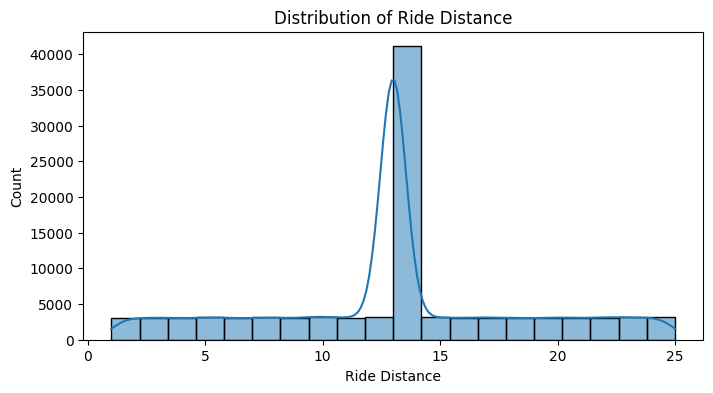

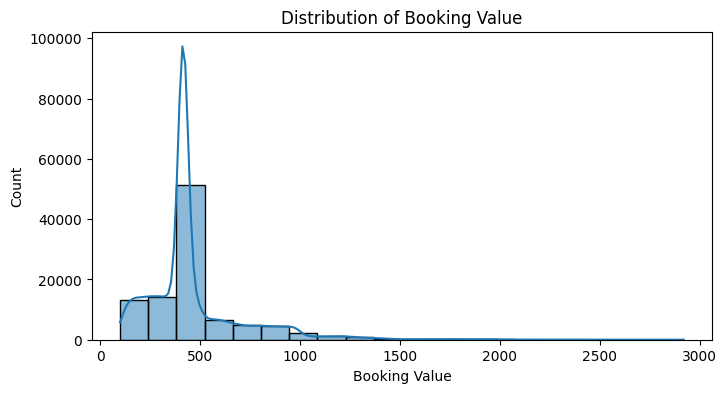

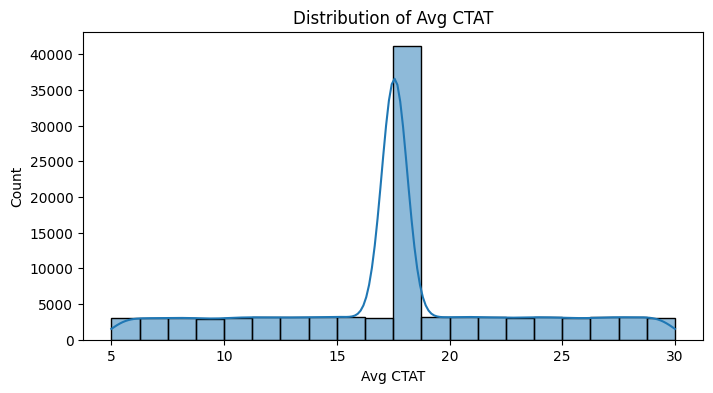

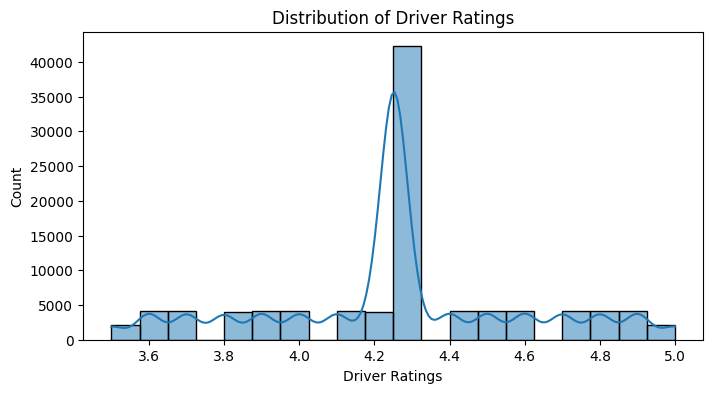

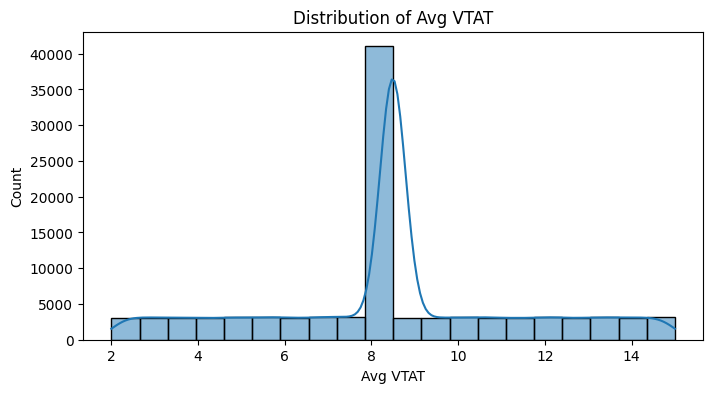

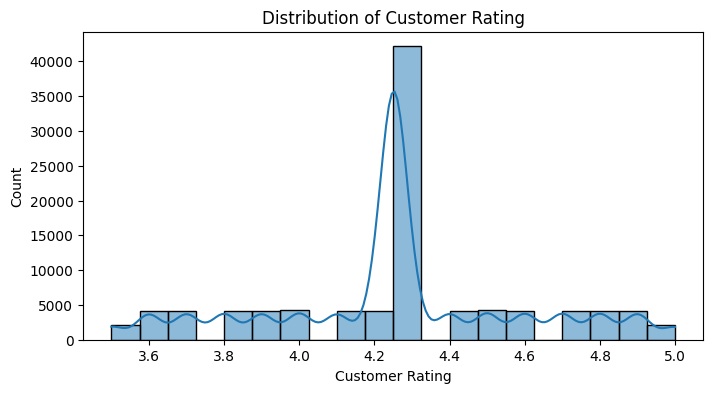

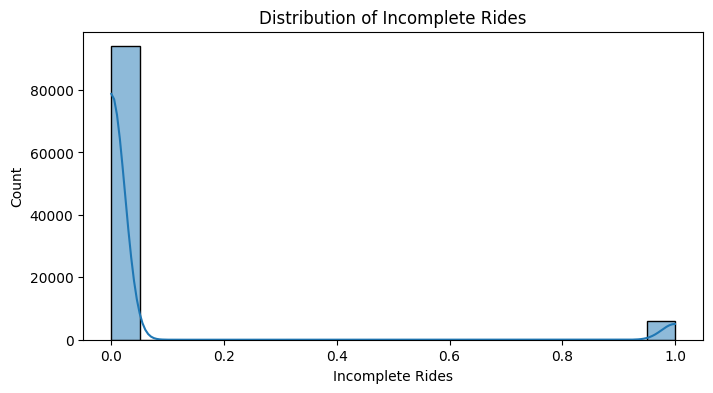

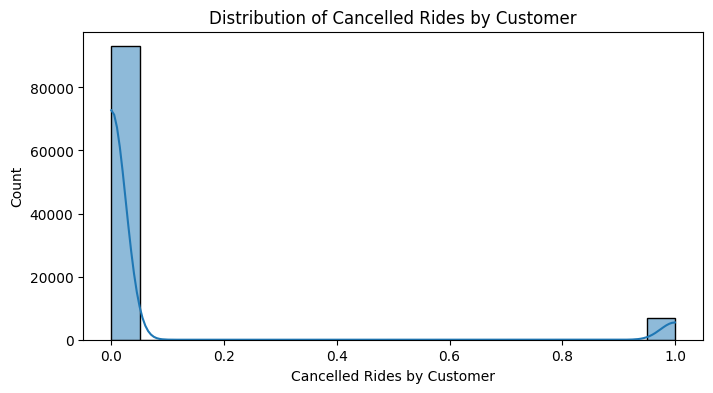

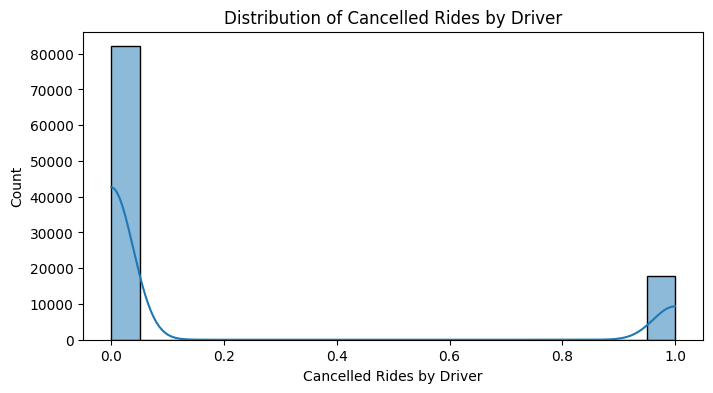

In [15]:
numerical_cols = ['Ride Distance', 'Booking Value', 'Avg CTAT', 'Driver Ratings', 'Avg VTAT', 'Customer Rating', 'Incomplete Rides', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

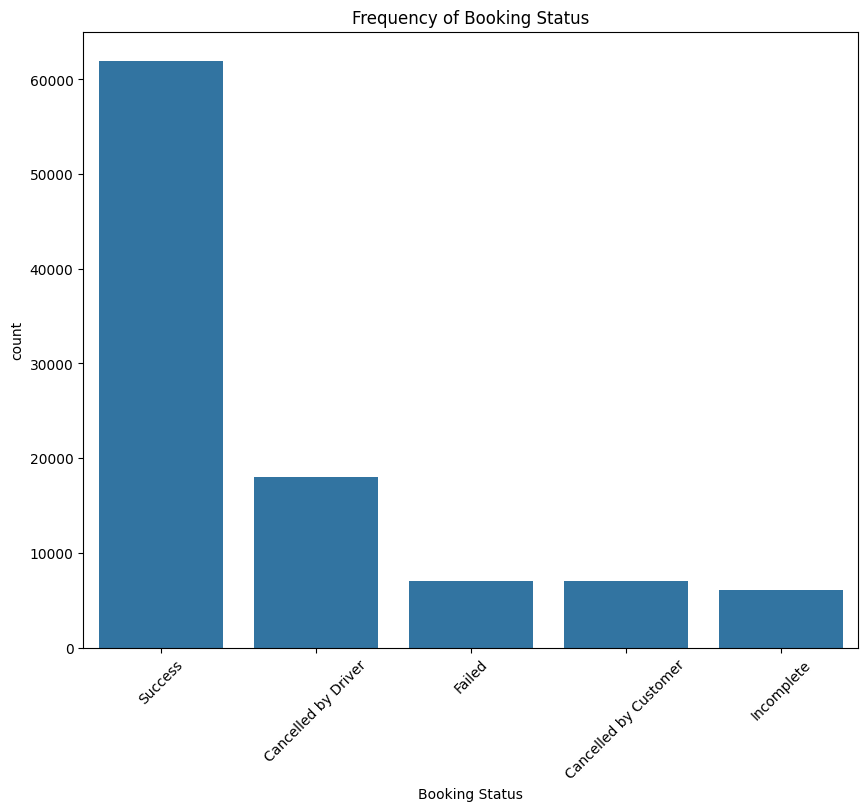

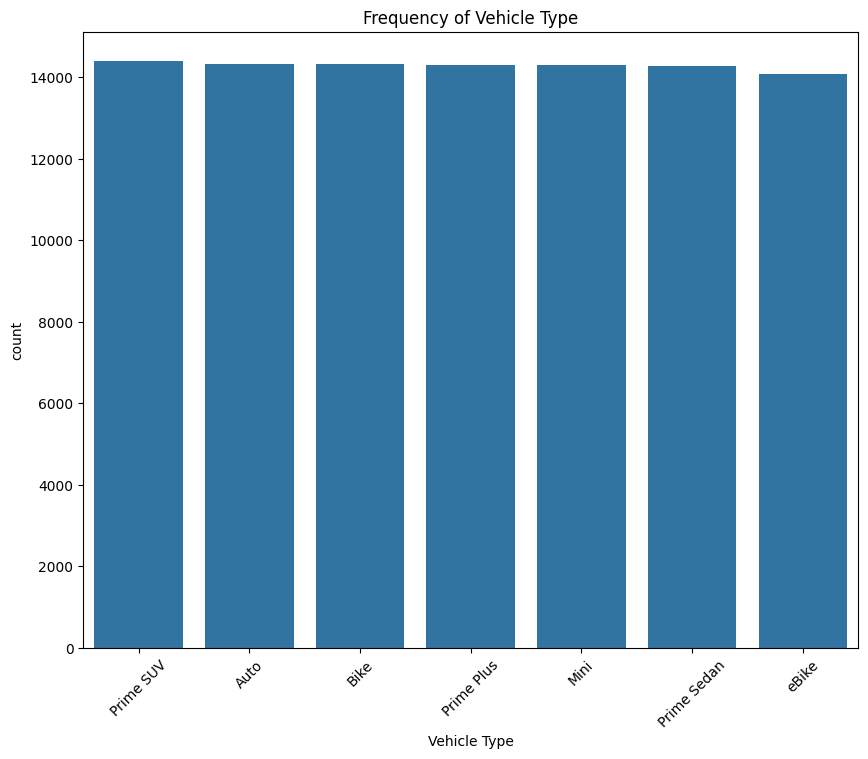

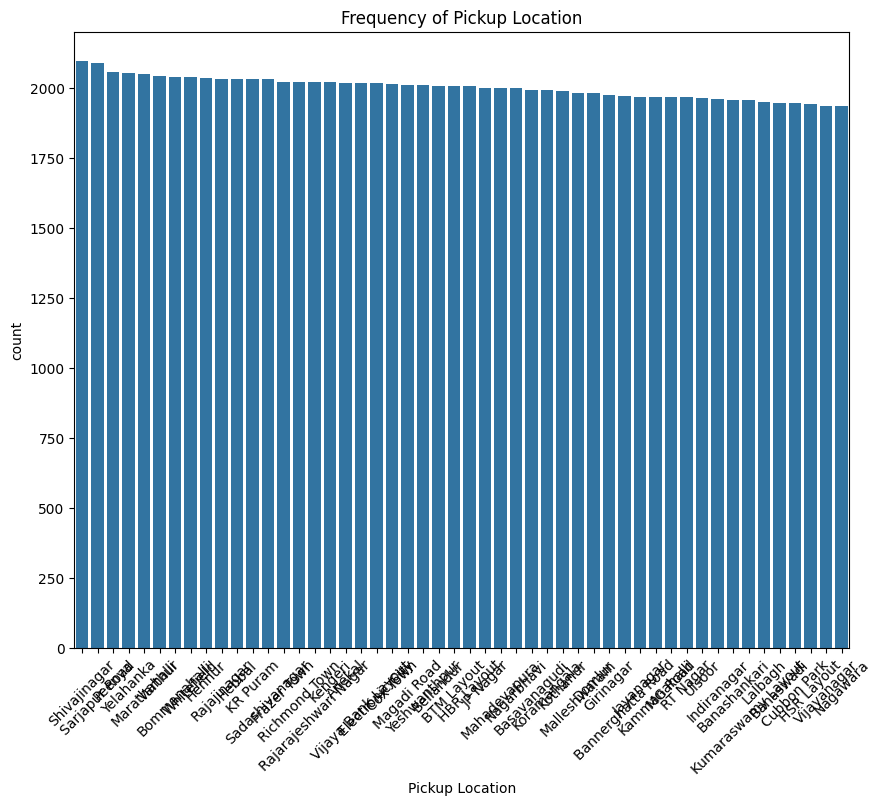

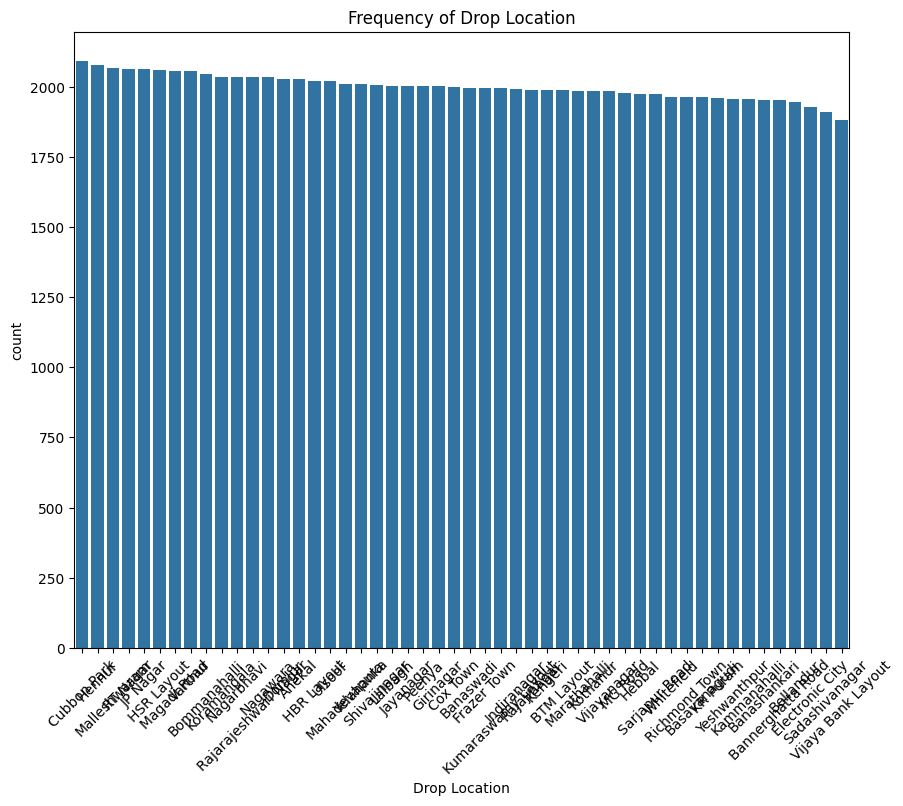

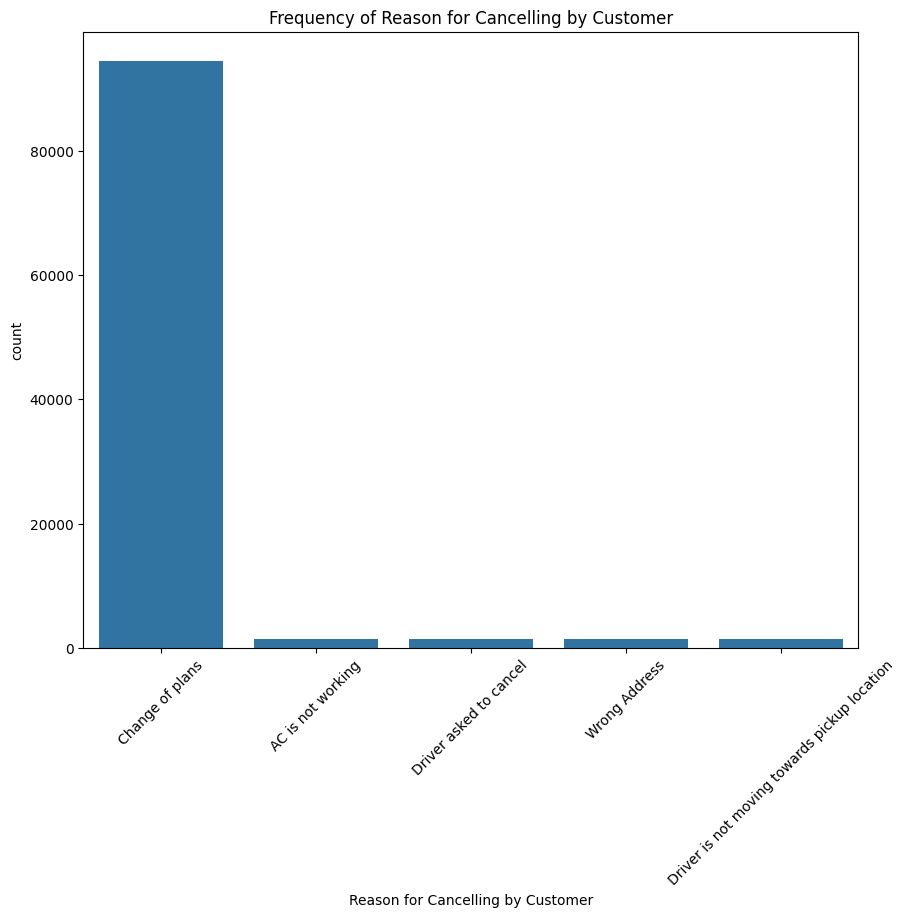

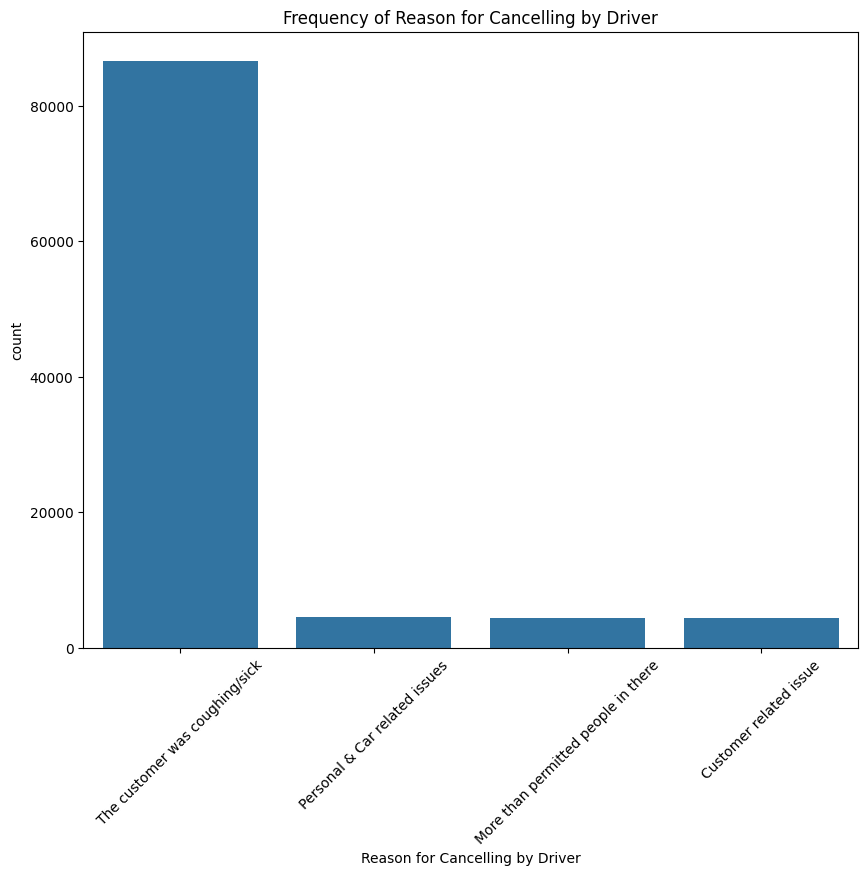

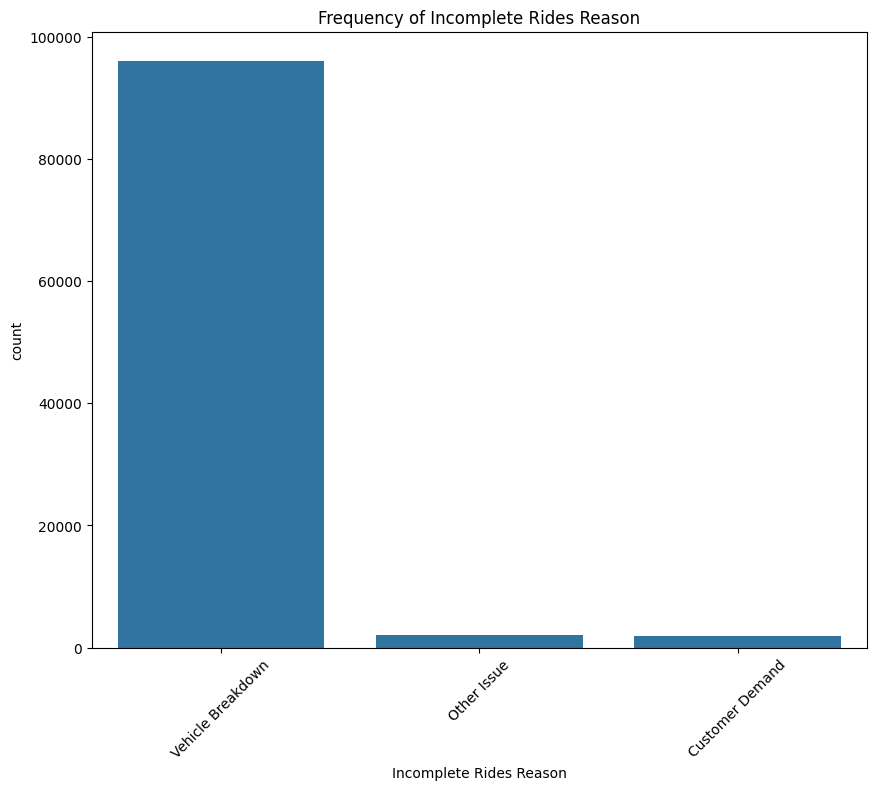

In [16]:
categorical_cols = ['Booking Status', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Reason for Cancelling by Customer', 'Reason for Cancelling by Driver', 'Incomplete Rides Reason']
for col in categorical_cols:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

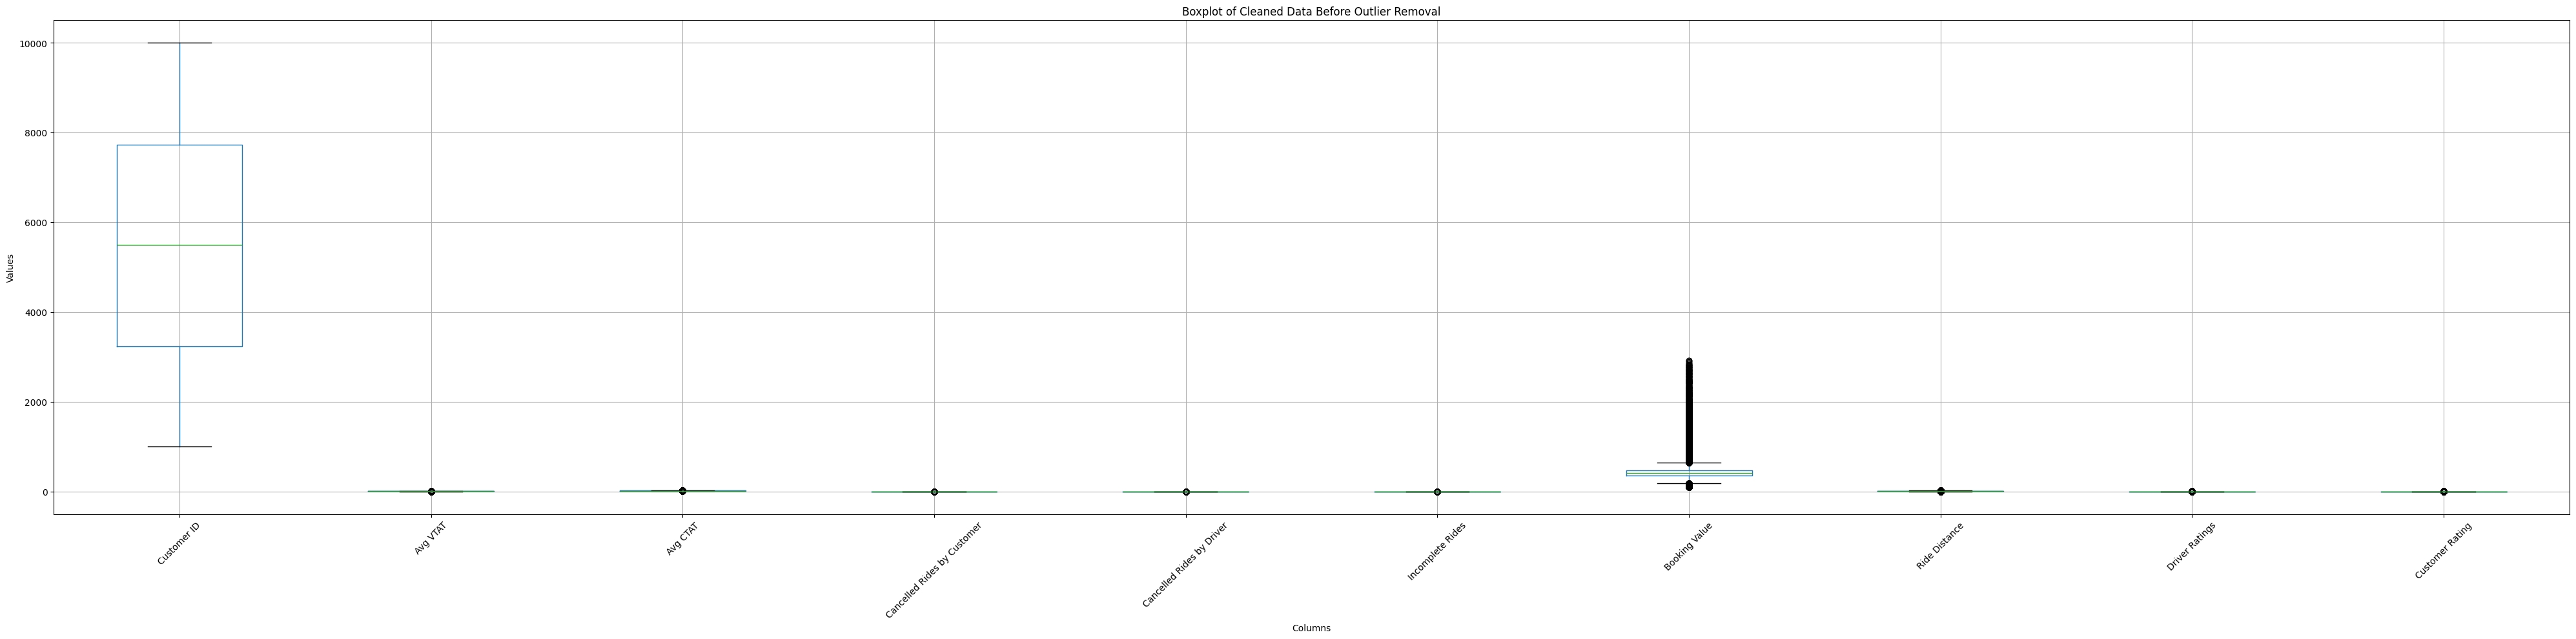

In [17]:
def boxplot_before(df):
    df.boxplot(figsize=(40, 10))
    plt.title('Boxplot of Cleaned Data Before Outlier Removal')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()


boxplot_before(data)

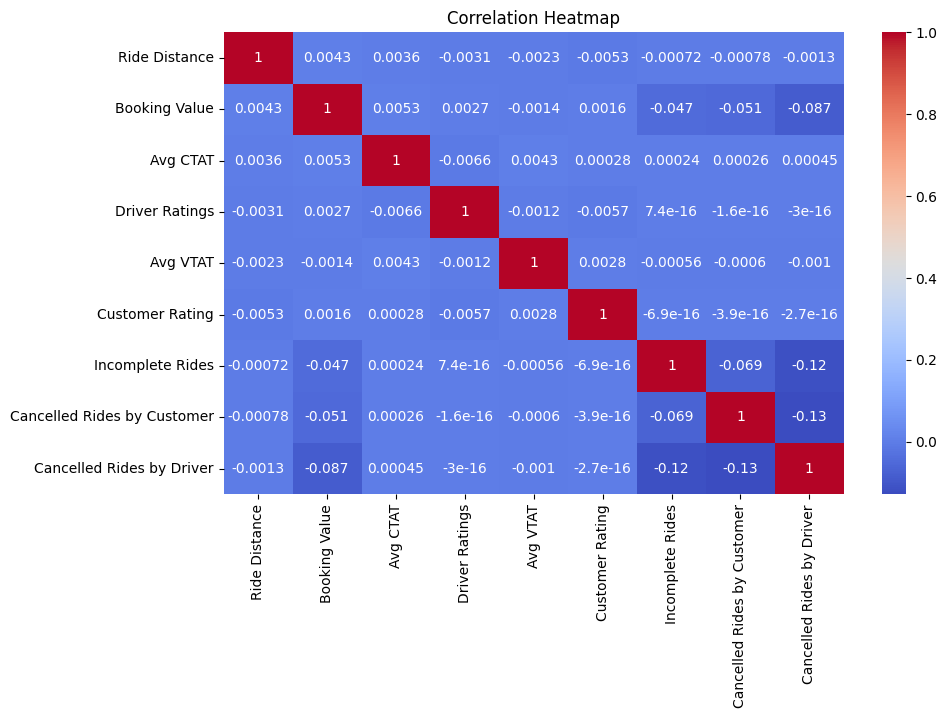

In [18]:
# Correlation heatmap
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Cancellation reasons
cancellation_reason = data['Reason for Cancelling by Driver'].value_counts()
print(cancellation_reason)

# Cancellation trends by vehicle type
cancellation_trends = data.groupby('Vehicle Type')[['Cancelled Rides by Driver', 'Cancelled Rides by Customer']].sum()
print(cancellation_trends)

Reason for Cancelling by Driver
The customer was coughing/sick         86602
Personal & Car related issues           4543
More than permitted people in there     4444
Customer related issue                  4411
Name: count, dtype: int64
              Cancelled Rides by Driver  Cancelled Rides by Customer
Vehicle Type                                                        
Auto                               2604                          990
Bike                               2539                         1033
Mini                               2593                         1005
Prime Plus                         2541                         1001
Prime SUV                          2580                         1004
Prime Sedan                        2580                          983
eBike                              2520                          978


In [20]:
# # Convert Date and Time columns
# data['Date'] = pd.to_datetime(data['Date'])
# data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

# # Extract day of week and hour of day
# data['Day_of_Week'] = data['Date'].dt.dayofweek  # Monday = 0, Sunday = 6
# data['Hour_of_Day'] = data['Time'].dt.hour

# # Plot booking trends over days and hours
# plt.figure(figsize=(8, 4))
# sns.countplot(x='Day_of_Week', data=data)
# plt.title('Bookings by Day of Week')
# plt.show()

# plt.figure(figsize=(8, 4))
# sns.countplot(x='Hour_of_Day', data=data)
# plt.title('Bookings by Hour of Day')
# plt.show()
# Extract components from Date and Time
# Ensure 'Date' is a datetime column
data['Date'] = pd.to_datetime(data['Date'])

# Combine 'Date' and 'Time' if 'Time' is not already part of a datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')  # Adjust format if needed

# Extract additional time-based features
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6
data['Hour'] = data['Time'].dt.hour

# Drop original 'Date' and 'Time' columns
data = data.drop(columns=['Date', 'Time'])

In [21]:
data

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for Cancelling by Customer,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Month,Day,Day_of_Week,Hour
0,CNR3746317213,Success,5506,Prime Plus,Ulsoor,Electronic City,11.57,21.92,0,Change of plans,...,0,Vehicle Breakdown,575.50,6.25,4.30000,3.500000,12,15,6,15
1,CNR7635473142,Success,5557,Prime SUV,Koramangala,Yelahanka,12.48,22.45,0,Change of plans,...,0,Vehicle Breakdown,236.10,3.23,3.60000,4.800000,12,23,0,19
2,CNR7887950851,Cancelled by Driver,8527,Bike,Hebbal,HBR Layout,8.49,17.56,0,Change of plans,...,0,Vehicle Breakdown,415.50,13.00,4.25185,4.251492,12,20,4,5
3,CNR7665963761,Cancelled by Driver,6925,Bike,Yeshwanthpur,Girinagar,8.49,17.56,0,Change of plans,...,0,Vehicle Breakdown,415.50,13.00,4.25185,4.251492,12,14,5,10
4,CNR9786748825,Success,5741,Auto,Ulsoor,Marathahalli,6.94,16.34,0,Change of plans,...,0,Vehicle Breakdown,602.97,17.84,4.50000,3.600000,1,5,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CNR2824226031,Success,6667,Prime Plus,Indiranagar,KR Puram,9.60,10.86,0,Change of plans,...,0,Vehicle Breakdown,621.92,9.45,4.80000,3.800000,12,25,2,13
99996,CNR1074550905,Success,5272,Prime SUV,Varthur,Richmond Town,2.52,28.38,0,Change of plans,...,0,Vehicle Breakdown,810.24,24.56,4.20000,4.500000,1,6,0,9
99997,CNR6860581204,Success,7889,eBike,Sadashivanagar,BTM Layout,12.47,25.94,0,Change of plans,...,0,Vehicle Breakdown,385.49,4.34,4.80000,4.900000,1,7,1,14
99998,CNR6123858694,Success,4307,Bike,Nagarbhavi,Whitefield,2.11,8.69,0,Change of plans,...,0,Vehicle Breakdown,725.01,1.72,3.80000,3.900000,1,3,4,21


In [22]:
# Save the cleaned data to a CSV file
data.to_csv('cleaned_data.csv', index=False)

Average fare per distance: Helps normalize the cost across different ride distances.
Is high-demand hour: Flag for rides during peak hours (e.g., 7-9 AM, 5-8 PM).

In [23]:
# Average fare per distance
data['Fare_per_km'] = data['Booking Value'] / (data['Ride Distance'] + 1e-5)

# High-demand hour flag
data['Is_High_Demand'] = data['Hour'].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 20) else 0)

In [24]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding
data = pd.get_dummies(data, columns=['Vehicle Type', 'Pickup Location', 'Drop Location'], drop_first=True)

# Convert all newly created dummy columns (if any are Boolean) to integers
dummy_cols = [col for col in data.columns if col.startswith(('Vehicle Type_', 'Pickup Location_', 'Drop Location_'))]
data[dummy_cols] = data[dummy_cols].astype(int)

# Label encoding for 'Booking Status'
le = LabelEncoder()
data['Booking Status'] = le.fit_transform(data['Booking Status'])


In [25]:
data

,Booking ID,Booking Status,Customer ID,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for Cancelling by Customer,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,...,Drop Location_Sadashivanagar,Drop Location_Sarjapur Road,Drop Location_Shivajinagar,Drop Location_Ulsoor,Drop Location_Varthur,Drop Location_Vijaya Bank Layout,Drop Location_Vijayanagar,Drop Location_Whitefield,Drop Location_Yelahanka,Drop Location_Yeshwanthpur
0,CNR3746317213,4,5506,11.57,21.92,0,Change of plans,0,The customer was coughing/sick,0,...,0,0,0,0,0,0,0,0,0,0
1,CNR7635473142,4,5557,12.48,22.45,0,Change of plans,0,The customer was coughing/sick,0,...,0,0,0,0,0,0,0,0,1,0
2,CNR7887950851,1,8527,8.49,17.56,0,Change of plans,1,Personal & Car related issues,0,...,0,0,0,0,0,0,0,0,0,0
3,CNR7665963761,1,6925,8.49,17.56,0,Change of plans,1,Personal & Car related issues,0,...,0,0,0,0,0,0,0,0,0,0
4,CNR9786748825,4,5741,6.94,16.34,0,Change of plans,0,The customer was coughing/sick,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CNR2824226031,4,6667,9.60,10.86,0,Change of plans,0,The customer was coughing/sick,0,...,0,0,0,0,0,0,0,0,0,0
99996,CNR1074550905,4,5272,2.52,28.38,0,Change of plans,0,The customer was coughing/sick,0,...,0,0,0,0,0,0,0,0,0,0
99997,CNR6860581204,4,7889,12.47,25.94,0,Change of plans,0,The customer was coughing/sick,0,...,0,0,0,0,0,0,0,0,0,0
99998,CNR6123858694,4,4307,2.11,8.69,0,Change of plans,0,The customer was coughing/sick,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
vif_data = pd.DataFrame()
vif_data['feature'] = numerical_cols
vif_data['VIF'] = [variance_inflation_factor(data[numerical_cols].values, i) for i in range(len(numerical_cols))]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 125 entries, Booking ID to Drop Location_Yeshwanthpur
dtypes: float64(7), int32(4), int64(110), object(4)
memory usage: 93.8+ MB


In [28]:
data.columns

Index(['Booking ID', 'Booking Status', 'Customer ID', 'Avg VTAT', 'Avg CTAT',
       'Cancelled Rides by Customer', 'Reason for Cancelling by Customer',
       'Cancelled Rides by Driver', 'Reason for Cancelling by Driver',
       'Incomplete Rides',
       ...
       'Drop Location_Sadashivanagar', 'Drop Location_Sarjapur Road',
       'Drop Location_Shivajinagar', 'Drop Location_Ulsoor',
       'Drop Location_Varthur', 'Drop Location_Vijaya Bank Layout',
       'Drop Location_Vijayanagar', 'Drop Location_Whitefield',
       'Drop Location_Yelahanka', 'Drop Location_Yeshwanthpur'],
      dtype='object', length=125)

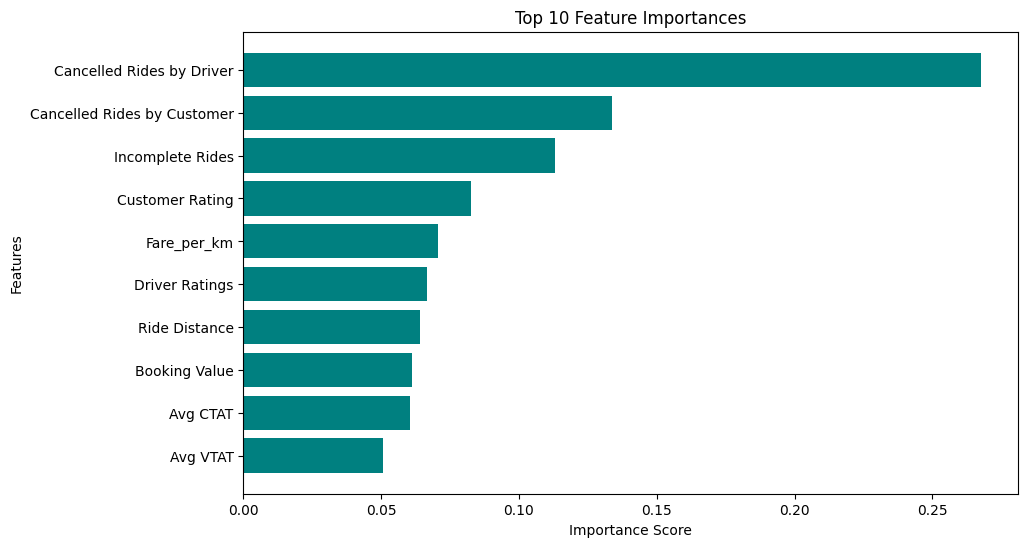

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

 #Drop 'Booking ID' from the dataframe
/#data = data.drop(columns=['Booking ID','Reason for Cancelling by Customer','Reason for Cancelling by Driver','Incomplete Rides Reason'])  # Drop Booking ID column

# Split data into features and target
X = data.drop(columns='Booking Status')  # Replace with your target column
y = data['Booking Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X_train.columns

# Sort feature indices based on their importance
sorted_idx = np.argsort(importances)

top_10_idx = sorted_idx[-10:]  # Last 10 elements in sorted order (highest importance)
top_10_features = feature_names[top_10_idx]
top_10_importances = importances[top_10_idx]


# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances, color='teal')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


Gradient Boosting Accuracy: 0.99995


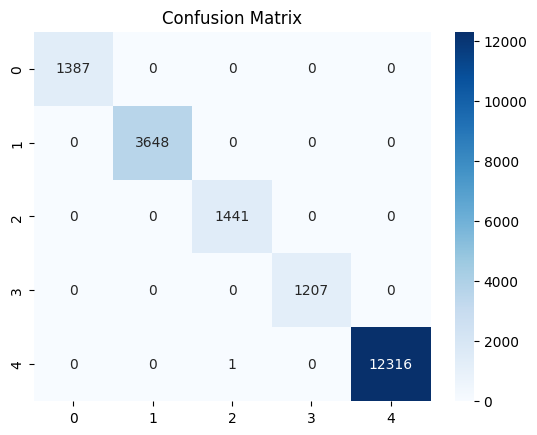

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, gb_pred))

# Confusion matrix
cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()